# The Sequential graph agent for intro

In [12]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
from IPython.display import display, Image

In [13]:
class AgentState(TypedDict):
    name : str
    age : int
    skills : List[str]
    result : str

In [15]:
def name_node(state: AgentState) -> AgentState:
    """The function which enters the name into the message."""

    state['result'] = f"Hi {state['name']}!, "
    return state

def age_node(state: AgentState) -> AgentState:
    """The function which enters the age into the message."""

    state['result'] = state['result'] + f"You are {state['age']} years old."
    return state

def skills_node(state: AgentState) -> AgentState:
    """This fucntion which gives the details of the skills in the message."""

    state['result'] = state['result'] + f" Your skills are "
    for val in state['skills']:
        state['result'] = state['result'] + val + ", "
    
    state['result'] = state['result'] + "etc."
    return state

In [16]:
graph = StateGraph(AgentState)

graph.add_node("first node", name_node)
graph.add_node("second node", age_node)
graph.add_node("third node", skills_node)

graph.add_edge("first node", "second node")
graph.add_edge("second node", "third node")

graph.set_entry_point("first node")
graph.set_finish_point("third node")

app = graph.compile()

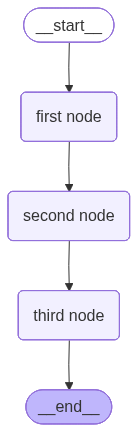

In [17]:
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
message = app.invoke({"name": "Gaurav", "age": 29, "skills" : ['cricket', 'badminton', 'trekking', 'swimming']})
message['result']

'Hi Gaurav!, You are 29 years old. Your skills are cricket, badminton, trekking, swimming, etc.'